<a href="https://colab.research.google.com/github/AliveBotswana/alivebotswana-eportfolio-msc-ai/blob/main/Assignment_for_Auto_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import missingno as msno
from google.colab import files
uploaded = files.upload()

Saving Unit02 auto-mpg (1).csv to Unit02 auto-mpg (1).csv


In [ ]:
auto_mpg_df = pd.read_csv('Unit02 auto-mpg (1).csv')

In [ ]:
auto_mpg_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


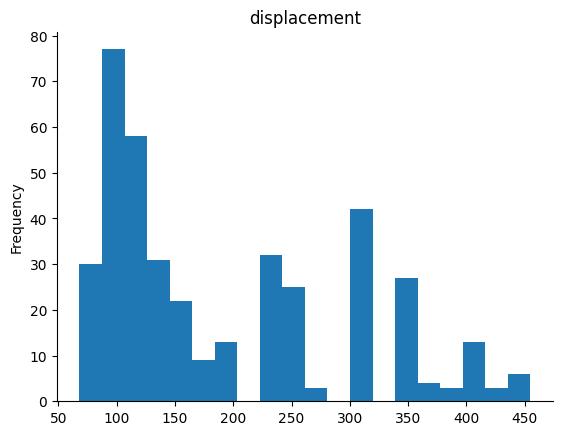

In [ ]:
from matplotlib import pyplot as plt
auto_mpg_df['displacement'].plot(kind='hist', bins=20, title='displacement')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
auto_mpg_df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
auto_mpg_df.tail()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [ ]:
auto_mpg_df.shape , auto_mpg_df.size


((398, 9), 3582)

Visualising Missing Values

<Axes: >

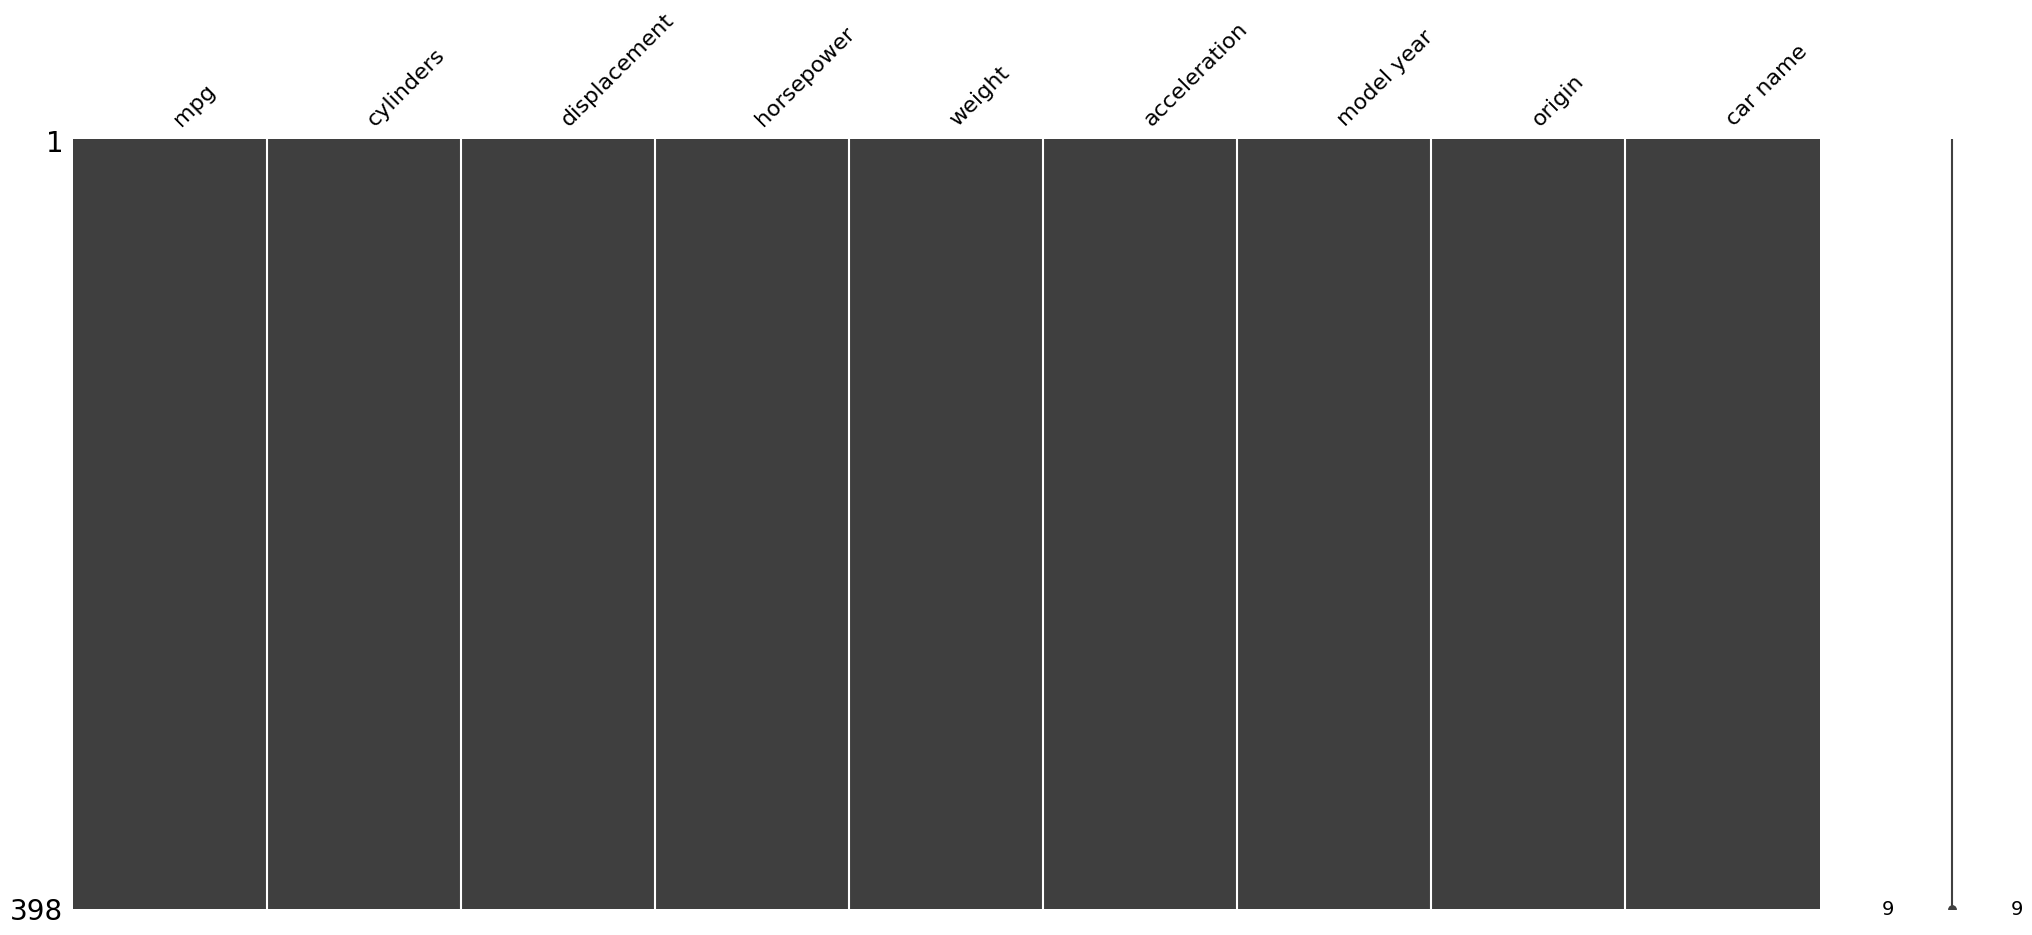

In [ ]:
msno.matrix(auto_mpg_df.sample(398))

In [ ]:
for col in auto_mpg_df.columns:
    if (auto_mpg_df[col] == '?').any():
        print(f"Column {col} contains '?' values")

Column horsepower contains '?' values


skewness_values = auto_mpg_df.skew()
error: could not convert string to float: '?'

the above command managed to locate the '?'



In [ ]:
auto_mpg_df = auto_mpg_df.replace('?', np.nan)


In [ ]:
for col in auto_mpg_df.columns:
    auto_mpg_df[col] = pd.to_numeric(auto_mpg_df[col], errors='coerce')

In [ ]:
auto_mpg_df_clean = auto_mpg_df.dropna()

In [ ]:
auto_mpg_df.fillna(auto_mpg_df.median(), inplace=True)

In [ ]:
print("Skewness:\n", auto_mpg_df.skew())

Skewness:
 mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.106224
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
car name             NaN
dtype: float64


What skewness means:
~0: Distribution is (close to) symmetric.
>0: Right-skewed (“long” tail to the right; more small values, fewer large ones).
<0: Left-skewed (“long” tail to the left; more large values, fewer small ones).

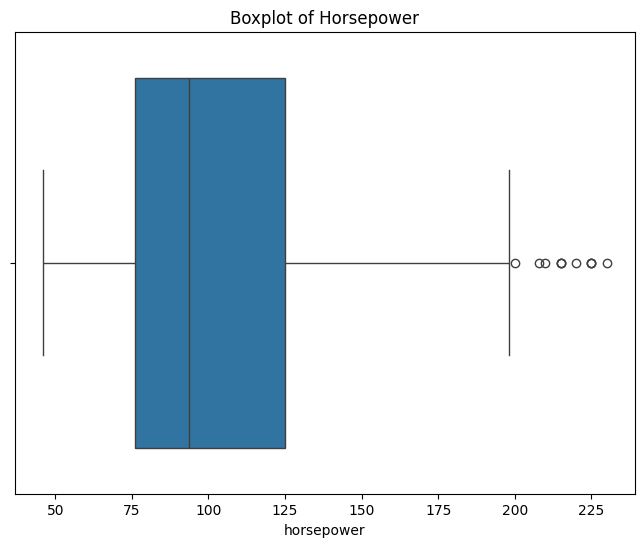

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=auto_mpg_df['horsepower'])
plt.title('Boxplot of Horsepower')
plt.show()

In [ ]:
Q1 = auto_mpg_df['horsepower'].quantile(0.25)
Q3 = auto_mpg_df['horsepower'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
auto_mpg_df_no_outliers = auto_mpg_df[(auto_mpg_df['horsepower'] >= lower_bound) & (auto_mpg_df['horsepower'] <= upper_bound)]

In [ ]:
print(f"Original dataset size: {len(auto_mpg_df)}")
print(f"After removing outliers: {len(auto_mpg_df_no_outliers)}")

Original dataset size: 398
After removing outliers: 387


In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Horsepower - Before Removing Outliers')

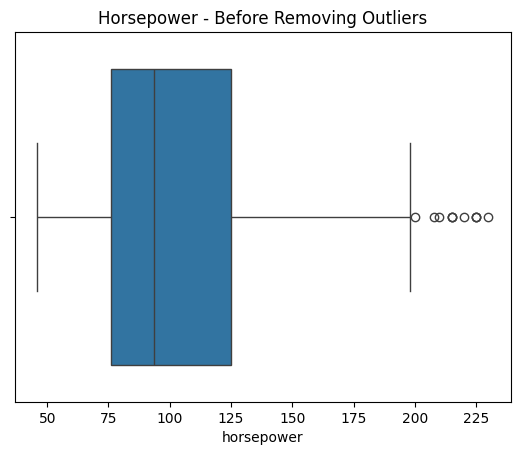

In [ ]:
sns.boxplot(x=auto_mpg_df['horsepower'])
plt.title('Horsepower - Before Removing Outliers')

Text(0.5, 1.0, 'Horsepower - After Removing Outliers')

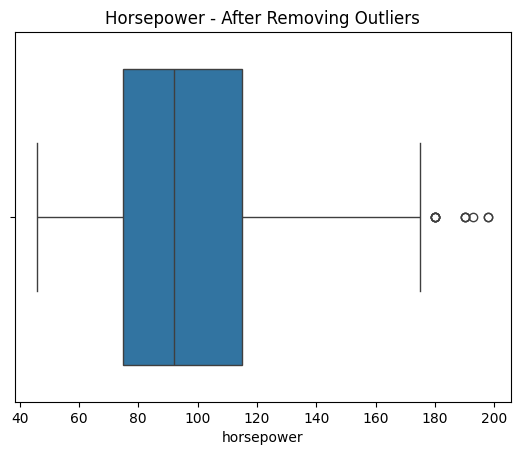

In [ ]:
sns.boxplot(x=auto_mpg_df_no_outliers['horsepower'])
plt.title('Horsepower - After Removing Outliers')

Text(0.5, 1.0, 'Horsepower Distribution - Before')

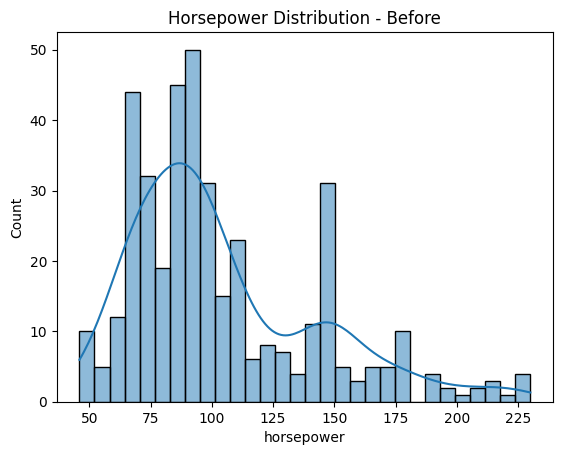

In [ ]:
sns.histplot(auto_mpg_df['horsepower'], bins=30, kde=True)
plt.title('Horsepower Distribution - Before')

Text(0.5, 1.0, 'Horsepower Distribution - After')

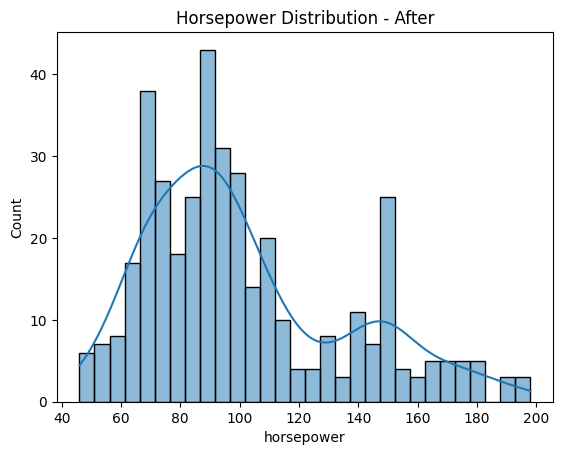

In [ ]:
sns.histplot(auto_mpg_df_no_outliers['horsepower'], bins=30, kde=True)
plt.title('Horsepower Distribution - After')


In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
print("Before removing outliers:\n", auto_mpg_df['horsepower'].describe())
print("\nAfter removing outliers:\n", auto_mpg_df_no_outliers['horsepower'].describe())


Before removing outliers:
 count    398.000000
mean     104.304020
std       38.222625
min       46.000000
25%       76.000000
50%       93.500000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

After removing outliers:
 count    387.000000
mean     101.098191
std       33.581421
min       46.000000
25%       75.000000
50%       92.000000
75%      115.000000
max      198.000000
Name: horsepower, dtype: float64


In [ ]:
print("\nKurtosis:\n", auto_mpg_df.kurtosis())


Kurtosis:
 mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
horsepower      0.763583
weight         -0.785529
acceleration    0.419497
model year     -1.181232
origin         -0.817597
car name             NaN
dtype: float64


3. Kurtosis
0: Similar to Normal (Mesokurtic)
>0: Leptokurtic; “heavy tails,” more outliers/extremes (“peaked”)
<0: Platykurtic; “light tails,” fewer outliers; distribution is flatter and broader

In [ ]:
corr_matrix = auto_mpg_df.corr()
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

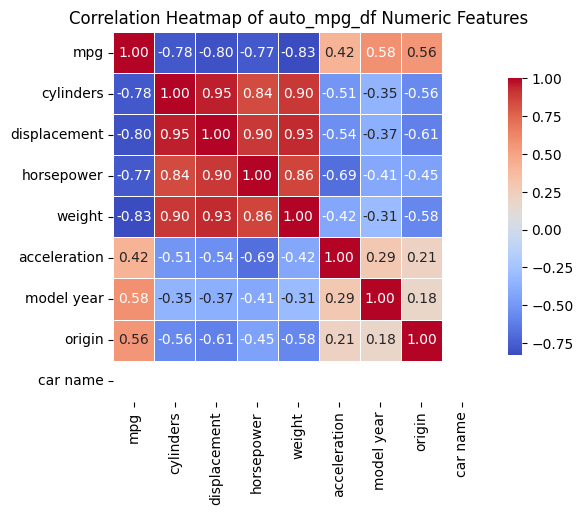

In [ ]:
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            linewidths=0.5, square=True, cbar_kws={"shrink": .75})
plt.title("Correlation Heatmap of auto_mpg_df Numeric Features")
plt.show()

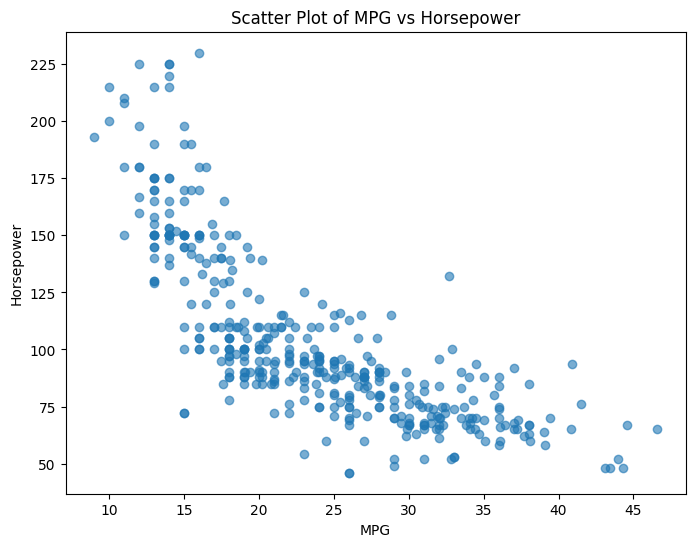

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(auto_mpg_df['mpg'], auto_mpg_df['horsepower'], alpha=0.6)
plt.title('Scatter Plot of MPG vs Horsepower')
plt.xlabel('MPG')
plt.ylabel('Horsepower')
plt.show()